<link rel="stylesheet" href="https://gist.github.com/vietjtnguyen/6643431/raw/9e88999ef07c40ee4af6be9cb3e0c9e618ba64a3/custom.css" type="text/css"/>

<style>
@import url(http://fonts.googleapis.com/css?family=Droid+Sans+Mono);

h1, h2, h3, h4, h5, h6 {
    font-family: "STIX-Bold", serif;
}
p, ol, ul {
    font-family: "STIX-Regular", serif;
    font-size: 115%;
}
ul ul, li, ul li, li li {
    font-family: "STIX-Regular", serif;
    font-size: 100%;
}
b {
    font-family: "STIX-Bold", serif;
    font-size: 115%;
}
i {
    font-family: "STIX-Italic", serif;
    font-size: 115%;
}
code, pre, div.input_prompt, div.output_area pre {
    font-family: "Droid Sans Mono", "Courier New", monospace;
}
.CodeMirror pre {
    font-family: "Droid Sans Mono", "Courier New", monospace;
}

/*
@import url(http://fonts.googleapis.com/css?family=Source+Code+Pro);
.CodeMirror pre {
    font-family: "cmu_typewriter_textregular", monospace;
    font-size: 115%;
}
*/

span.MathJax {
    font-size: 86.956521739%;
}
</style>

#Логистическая регрессия


##Постановка задачи


Рассмотрим задачу классификации. Имеем датасет $\mathcal{D}$ состоящий из $N$ примеров. Каждый пример это вектор признаков и номер класса. Для каждого примера $n$ вектор признаков это $d+1$ мерный вектор-столбец  ${\bf x}_n$ с $d$ вещественными компонентами -- признаками, и 1 координата равна единице: $x_0=1$. Номер класса $n$-го примера -- $y_n$, который может принимать два возможных значения: $+1$ or $-1$.

$$
\mathcal{D} = \lbrace ({\bf x}_1, y_1), ({\bf x}_2, y_2), ..., ({\bf x}_N, y_N) \rbrace \\
{\bf x}_n = \begin{bmatrix} 1 & x_1 & ... & x_d \end{bmatrix}^T 
$$

#Теоретические пререквизиты

Несмотря на название "регрессия", логистическая регрессия является линейной вероятностной моделью классификации.

Используем линейную модель, с весами $\bf w$

$$
{\bf w} = \begin{bmatrix} w_0 & w_1 & ... & w_d \end{bmatrix}^T \\
s = w_0 + w_1 x_1 + \;...\; + w_d x_d = \sum_{i=0}^d w_i x_i = {\bf w} \cdot {\bf x} = {\bf w}^T {\bf x}
$$

Заметим, что однородные координаты (с $1$ в нулевом компоненте) позволяют нам не использовать явно параметр-смещение (${\bf w}^T {\bf x}+b$).

Линейная классификация использует пороговое значение для классификации:

$$
h({\bf x}) = \operatorname{sign}(s)
$$

Логистическая регрессия использует логистическую функцию для предсказания вероятности принадлежности объекта классу:

$$
h({\bf x}) = \sigma(s)
$$

Логистическая функция (сигмоид)

$$
\sigma(s) = \frac{e^s}{1+e^s} = \frac{1}{1+e^{-s}}
$$

Данная функция, в отличие от $sign(s)$, является гладкой и позволяет вычислять градиент. Существуют также альтернативные варианты таких функций, например гиперболический тангенс.

Предполагаем, что данные были сгенерированы согласно некоторому распределению $f$.

$$
P(y\mid{\bf x})=\begin{cases}
f({\bf x}) & \text{for }y=+1 \\
1-f({\bf x}) & \text{for }y=-1
\end{cases}
$$

Будем подбирать параметры $h({\bf x})$ , которые наилучшим образом соответствуют такому распределению (хоть мы и не знаем его заранее)

$$
h({\bf x})=\sigma({\bf w}^T {\bf x})\approx f({\bf x})
$$

Подчеркнем, что мы не знаем заранее функцию распределения классов, только выборку классов (наши данные), которая ему соответствует.

##Измерение ошибки

Чтобы обучить нашу гипотезу, необходимо найти значения параметров ${\bf w}$ (the weight vector) которые минимизируют некоторую меру ошибки $E$, зависящую от данных.

$$
{\bf w}_h = \underset{{\bf w}}{\operatorname{argmin}} \; E({\bf w})
$$

Будем использовать меру ошибки, основываясь на метрике *правдоподобия*. В таком подходе есть небольшое противоречие. На самом деле мы ищем гипотезу, которая будет наиболее вероятна при наших данных: $\underset{h}{\operatorname{argmax}} P(h\mid{\bf x})$. Метод правдоподобия же будет искать гипотезу, для которой максимальна вероятность, что данные были именно такими: $\underset{h}{\operatorname{argmax}} P({\bf x}\mid h)$.

Вероятность класса при использовании гипотезы$h$:

$$
P(y\mid{\bf x})=\begin{cases}
h({\bf x}) & \text{for }y=+1 \\
1-h({\bf x}) & \text{for }y=-1
\end{cases} \\
$$

где $h({\bf x})=\sigma({\bf w}^T {\bf x})$.

Воспользуемся замечательным свойством сигмоида: $\sigma(-s)=1-\sigma(s)$.

$$
\text{if } y = +1 \text{ then } h({\bf x}) = \sigma({\bf w}^T {\bf x}) = \sigma(y \; {\bf w}^T {\bf x}) \\
\text{if } y = -1 \text{ then } 1 - h({\bf x}) = 1 - \sigma({\bf w}^T {\bf x}) = \sigma(- {\bf w}^T {\bf x}) = \sigma(y \; {\bf w}^T {\bf x}) \\
$$

Тогда,

$$
P(y\mid{\bf x})=\sigma(y\; {\bf w}^T {\bf x})
$$

Правдоподобие для данных $\mathcal{D}$ с $N$ примерами для произвольной гипотезы (обозначено $g$ ):

$$
L(\mathcal{D} \mid g) =
\prod_{n=1}^{N} P(y_n \mid {\bf x}_n) =
\prod_{n=1}^{N} \sigma(y_n \; {\bf w}_g^T {\bf x}_n)
$$

Тогда поиск хорошей гипотезы заключается в поиске параметров  ${\bf w}$ которые максимизируют правдоподобие.

$$
{\bf w}_h =
\underset{{\bf w}}{\operatorname{argmax}} \; L(\mathcal{D} \mid h) = 
\underset{{\bf w}}{\operatorname{argmax}} \; \sigma(y_n \; {\bf w}^T {\bf x}_n)
$$

Максимизация правдоподобия эквивалентна максимизации натурального логарифма правдоподобия, т.к. натуральный логарифм является монотонно возрастающей функцией:

$$
\underset{{\bf w}}{\operatorname{argmax}} \; \ln \left( \prod_{n=1}^{N} \sigma(y_n \; {\bf w}^T {\bf x}_n) \right)
$$



$$
\underset{{\bf w}}{\operatorname{argmax}} \; \frac{1}{N} \ln \left( \prod_{n=1}^{N} \sigma(y_n \; {\bf w}^T {\bf x}_n) \right)
$$

Сведем к задаче минимизации

$$
\underset{{\bf w}}{\operatorname{argmin}} \left[ -\frac{1}{N} \ln \left( \prod_{n=1}^{N} \sigma(y_n \; {\bf w}^T {\bf x}_n) \right) \right]
$$



$$
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( \frac{1}{\sigma(y_n \; {\bf w}^T {\bf x}_n)} \right)
$$



$$
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( 1 + e^{y_n \; {\bf w}^T {\bf x}_n} \right)
$$

Получаем следующую формулу для измерения ошибки, называемую "перекрестная энтропия"

$$
E({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

Получаем, что наша мера ошибки по выборке является средней ошибкой каждого отдельно взятого примера из выборки.

$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n)
$$

Таким образом, для обучения гипотезы, нам необходима следующая задачи оптимизации:

$$
{\bf w}_h =
\underset{{\bf w}}{\operatorname{argmin}} \; E_\text{in}({\bf w}) =
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( 1 + e^{y_n \; {\bf w}^T {\bf x}_n} \right)
$$

##Обучение



$$
{\bf w}_{i+1} = {\bf w}_i + \nabla E({\bf w}_i)
$$



$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

Производная

$$
\frac{d}{d{\bf w}} e(h({\bf x}_n), y_n)
= \frac{-y_n \; {\bf x}_n \; e^{-y_n {\bf w}^T {\bf x}_n}}{1 + e^{-y_n {\bf w}^T {\bf x}_n}}
= -\frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}}
$$



$$
\begin{align}
\nabla E({\bf w})
&= \frac{d}{d{\bf w}} \left[ \frac{1}{N} \sum_{n=1}^N e(h({\bf x}_n), y_n) \right] \\
&= \frac{1}{N} \sum_{n=1}^N \frac{d}{d{\bf w}} e(h({\bf x}_n), y_n) \\
&= \frac{1}{N} \sum_{n=1}^N \left( - \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \right) \\
&= - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \\
\end{align}
$$



$$
\begin{align}
{\bf w}_{i+1} &= {\bf w}_i - \eta \; \nabla E_\text{in}({\bf w}_i) \\
&= {\bf w}_i - \eta \; \left( - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
&= {\bf w}_i + \eta \; \left( \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
\end{align}
$$

где $\eta$ --  learning rate.

#Example

In [0]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import itertools
import random
import time

In [0]:
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0))}
BinaryRdBu = matplotlib.colors.LinearSegmentedColormap('BinaryRdBu', cdict, 2)
cdict = {'red':   ((0.0, 0.9, 0.9),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.9, 0.9),
                   (1.0, 0.9, 0.9)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.9, 0.9))}
LightRdBu = matplotlib.colors.LinearSegmentedColormap('LightRdBu', cdict)
cdict = {'red':   ((0.0, 1.0, 1.0),
                   (0.4, 0.7, 0.7),
                   (0.5, 0.0, 0.0),
                   (0.6, 0.7, 0.7),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 1.0, 1.0),
                   (0.4, 0.7, 0.7),
                   (0.5, 0.0, 0.0),
                   (0.6, 0.7, 0.7),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 1.0, 1.0),
                   (0.4, 0.7, 0.7),
                   (0.5, 0.0, 0.0),
                   (0.6, 0.7, 0.7),
                   (1.0, 1.0, 1.0))}
HalfContour = matplotlib.colors.LinearSegmentedColormap('HalfContour', cdict)

In [0]:
logistic = lambda s: 1.0 / (1.0 + np.exp(-s))

##Data Set

In [0]:
d_x = 2

phi = lambda x: x
d_z = len( phi( np.ones((d_x+1,)) ) ) - 1

In [0]:
N = 100

In [0]:
P_x = lambda: np.array( [1.0] + [np.random.uniform(-1, 1) for i in range(d_x)] ) # simulates P(x)

In [0]:
def generate_target(d, hardness=20.0, offset_ratio=0.25, w_f=None):
    

    if w_f is None:
        w_f = np.array([np.random.uniform(-hardness * offset_ratio, hardness * offset_ratio)] +
                       [np.random.uniform(-hardness, hardness) for i in range(d)])
    
    
    f = lambda z: logistic(w_f.dot(z.T))
    P_f = lambda z: ( np.array([np.random.uniform() for i in range(z.shape[0])]) <= f(z) )*2.0-1.0
        #scale from [0, 1] to [-1, 1] 
    
    return w_f, f, P_f

In [0]:
w_f, f, P_f = generate_target(d_z, hardness=12.0)

In [0]:
def generate_data_samples(N, P_x, phi, P_f):
    
    x = np.array([P_x() for i in range(N)])
    z = np.apply_along_axis(phi, 1, x)
    y = P_f(z)
    
    cross_entropy_error = lambda w: np.mean(np.log(1 + np.exp(-y * w.dot(z.T))))
    
    return x, z, y, cross_entropy_error

In [0]:
x, z, y, cross_entropy_error = generate_data_samples(N, P_x, phi, P_f)

In [0]:
def generate_fill_data(s=300, phi=lambda x: x):
    # create grid of points
    x_1, x_2 = np.array(np.meshgrid(np.linspace(-1, 1, s), np.linspace(-1, 1, s)))
    
    # reshape the grid to an array of homogenized points
    x_grid = np.hstack((np.ones((s*s, 1)), np.reshape(x_1, (s*s, 1)), np.reshape(x_2, (s*s, 1))))
    
    # transform homogenized points into z-space
    z_grid = np.apply_along_axis(phi, 1, x_grid)
    
    return x_1, x_2, x_grid, z_grid

In [0]:
def apply_to_fill(z_grid, func):
    s = int(np.sqrt(z_grid.shape[0]))
    
    # calculate function at each point on the grid and reshape it back to a grid
    return np.reshape(func(z_grid), (s, s))

In [0]:
x_1, x_2, x_grid, z_grid = generate_fill_data(300, phi)
f_grid = apply_to_fill(z_grid, f)

In [0]:
def plot_data_set_and_hypothesis(x, y, x_1, x_2, f_grid=None, title=''):
    start_time = time.time()
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect(1)
    ax.set_xlabel(r'$x_1$', fontsize=18)
    ax.set_ylabel(r'$x_2$', fontsize=18)
    if not title == '':
        ax.set_title(title, fontsize=18)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.set_axisbelow(True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.autoscale(False)
    
    if not f_grid is None:
        # plot background probability
        ax.pcolor(x_1, x_2, f_grid, cmap=LightRdBu, vmin=0, vmax=1)
        
        # plot decision boundary
        ax.contour(x_1, x_2, f_grid*2-1, cmap=HalfContour, levels=[-0.5, 0.0, 0.5], vmin=-1, vmax=1)
    
    
    ax.scatter(x[:, 1], x[:, 2], s=40, c=y, cmap=BinaryRdBu, vmin=-1, vmax=1)
    
    
    
    return fig

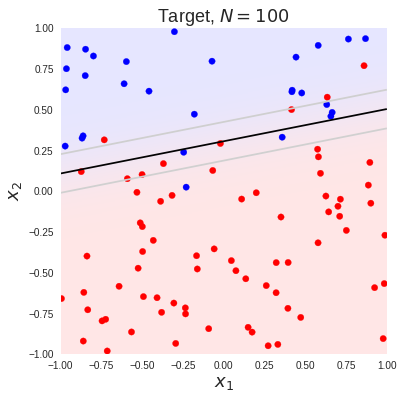

In [0]:
target_fig = plot_data_set_and_hypothesis(x, y, x_1, x_2, f_grid,
                                          title=r'Target, $N={:}$'.format(N))

##Learning a Hypothesis

Let's initialize our hypothesis parameters to zero and perform gradient descent with a learning rate of $\eta=10.0$. We'll continue iteration for a maximum of $\text{10,000}$ iterations or until the change in the weight vector's norm is smaller than $0.1\%$, which ever comes first. As a reminder, our update rule is

$$
{\bf w}_{i+1} = {\bf w}_i + \eta \; \left( \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right)
$$

In [0]:
def gradient_descent(z, y, w_h=None, eta=1.0, max_iterations=10000, epsilon=0.001):
    if w_h == None:
        w_h = np.array([0.0 for i in range(z.shape[1])])
    
    # save a history of the weight vectors into an array
    w_h_i = [np.copy(w_h)]
    
    for i in range(max_iterations):
        subset_indices = range(z.shape[0])
        # subset_indices = np.random.permutation(z.shape[0])[:N/8] # uncomment for stochastic gradient descent
        
        grad_E_in = np.mean(np.tile(- y[subset_indices] /
                                        ( 1.0 + np.exp(y[subset_indices] * w_h.dot(z[subset_indices].T)) ),
                                    (z.shape[1], 1)).T * 
                            z[subset_indices], axis=0)
        
        w_h -= eta * grad_E_in
        w_h_i.append(np.copy(w_h))
        
        if np.linalg.norm(grad_E_in) <= np.linalg.norm(w_h) * epsilon:
            break
    
    return np.array(w_h_i)

In [0]:
w_h_i = gradient_descent(z, y, eta=4.0)
w_h = w_h_i[-1]
print('Number of iterations: {:}'.format(w_h_i.shape[0]))

Number of iterations: 65


Visualize the final hypothesis $g$ in the input space $\mathcal{X}$.

In [0]:
h = lambda z: logistic(w_h.dot(z.T))
h_grid = apply_to_fill(z_grid, h)

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


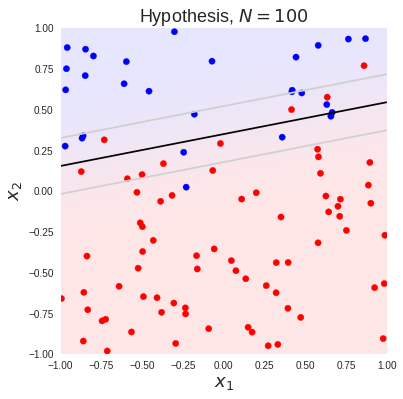

In [0]:
full_N_fig = plot_data_set_and_hypothesis(x, y, x_1, x_2, h_grid,
                                          title=r'Hypothesis, $N={:}$'.format(N))
target_fig.show()

Since we have the target distribution we can stochastically estimate the out-of-sample error. Classifying using the logistic regression is a matter of choosing the label that is most probable for a data point. So if the output of the hypothesis function $h$ is greater than $0.5$ we label the data point $y=+1$ and vice versa.

In [0]:
def in_sample_error(z, y, h):
    y_h = (h(z) >= 0.5)*2-1
    return np.sum(y != y_h) / float(len(y))

In [0]:
def estimate_out_of_sample_error(P_x, phi, P_f, h, N=10000, phi_h=None):
    x = np.array([P_x() for i in range(N)])
    z = np.apply_along_axis(phi, 1, x)
    if not phi_h is None:
        z_h = np.apply_along_axis(phi_h, 1, x)
    else:
        z_h = z
    y = P_f(z)
    y_h = (h(z_h) >= 0.5)*2-1
    return np.sum(y != y_h) / float(N)

Note the relatively high error rates for a toy data set due to treating the decision boundary as a hard threshold despite the noisy nature of the target distribution. The higher our `hardness` factor on our toy data set the smaller this error rate will be.

In [0]:
print('Target weights: {:}'.format(w_f))
print('Hypothesis weights: {:}'.format(w_h))
print('Hypothesis in-sample error: {:.2%}'.format(in_sample_error(z, y, h)))
print('Hypothesis out-of-sample error: {:.2%}'.format(estimate_out_of_sample_error(P_x, phi, P_f, h)))

Target weights: [ 2.81235945  1.83099542 -9.26924968]
Hypothesis weights: [ 2.22202252  1.25003304 -6.39698525]
Hypothesis in-sample error: 8.00%
Hypothesis out-of-sample error: 7.84%


##Learning with Less Data

If we learn from a smaller set of data, say $N=10$, we should see a larger discrepancy in the out-of-sample error.

In [0]:
N_subset = 10
subset_indices = np.random.permutation(N)[:N_subset]
x_subset = x[subset_indices, :]
z_subset = z[subset_indices, :]
y_subset = y[subset_indices]

w_h_i_subset = gradient_descent(z_subset, y_subset, eta=10.0)
w_h_subset = w_h_i_subset[-1]
print('Number of iterations: {:}'.format(w_h_i_subset.shape[0]))

Number of iterations: 34


In [0]:
h_subset = lambda z: logistic(w_h_subset.dot(z.T))
h_subset_grid = apply_to_fill(z_grid, h_subset)

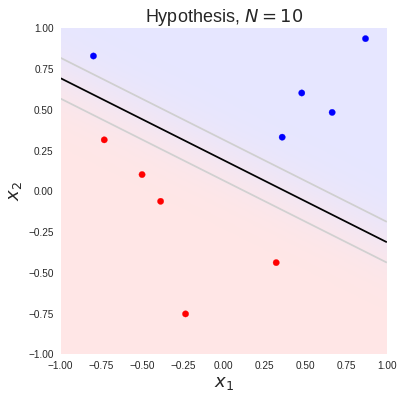

In [0]:
subset_N_fig = plot_data_set_and_hypothesis(x_subset, y_subset, x_1, x_2, h_subset_grid,
                                            title=r'Hypothesis, $N={:}$'.format(N_subset))
target_fig.show()
full_N_fig.show()

If the resulting hypothesis looks off we need to remember what the learning algorithm sees: just the data.

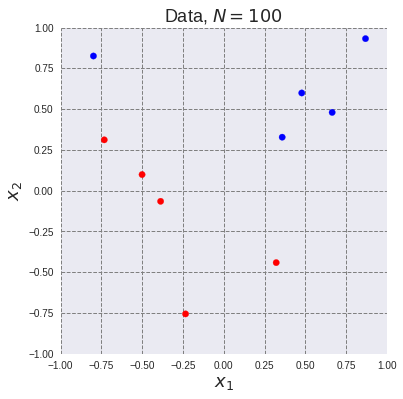

In [0]:
naked_fig = plot_data_set_and_hypothesis(x_subset, y_subset, x_1, x_2, None, title=r'Data, $N={:}$'.format(N))

With the metrics below we can see that the quality of the final hypothesis depends on the number of samples we have as predicted by learning theory.

In [0]:
print('Target weights: {:}'.format(w_f))
print('Target in-sample error: {:.2%}'.format(in_sample_error(z, y, f)))
print('Target out-of-sample error: {:.2%}'.format(estimate_out_of_sample_error(P_x, phi, P_f, f)))

Target weights: [ 2.81235945  1.83099542 -9.26924968]
Target in-sample error: 7.00%
Target out-of-sample error: 7.60%


In [0]:
print('Hypothesis (N={:}) weights: {:}'.format(N, w_h))
print('Hypothesis (N={:}) in-sample error: {:.2%}'.format(N, in_sample_error(z, y, h)))
print('Hypothesis (N={:}) out-of-sample error: {:.2%}'.format(N, estimate_out_of_sample_error(P_x, phi, P_f, h)))

Hypothesis (N=100) weights: [ 2.22202252  1.25003304 -6.39698525]
Hypothesis (N=100) in-sample error: 8.00%
Hypothesis (N=100) out-of-sample error: 7.84%


In [0]:
print('Hypothesis (N={:}) weights: {:}'.format(N_subset, w_h_subset))
print('Hypothesis (N={:}) in-sample error: {:.2%}'.format(N_subset, in_sample_error(z_subset, y_subset, h_subset)))
print('Hypothesis (N={:}) out-of-sample error: {:.2%}'.format(N_subset, estimate_out_of_sample_error(P_x, phi, P_f, h_subset)))

Hypothesis (N=10) weights: [ 1.6427584  -4.41917056 -8.7915774 ]
Hypothesis (N=10) in-sample error: 0.00%
Hypothesis (N=10) out-of-sample error: 19.45%


##Learning Curve

In [0]:
start_time = time.time()

error_histories = []

for runs in range(10):
    N = 201
    x = np.array([P_x() for i in range(N)])
    z = np.apply_along_axis(phi, 1, x)
    y = P_f(z)
    
    error_history = []
    
    for N_subset in range(1, N+1, 4):
        x_subset = x[:N_subset, :]
        z_subset = z[:N_subset, :]
        y_subset = y[:N_subset]
        
        w_h = gradient_descent(z_subset, y_subset)[-1]
        h = lambda z: logistic(w_h.dot(z.T))
        
        error_history.append([N_subset,
                              in_sample_error(z_subset, y_subset, h),
                              estimate_out_of_sample_error(P_x, phi, P_f, h)])
    
    error_histories.append(error_history)

error_history = np.mean(np.array(error_histories), axis=0)

print('Error history took {:.2f} seconds.'.format(time.time()-start_time))

Error history took 65.32 seconds.


In [0]:
target_error = estimate_out_of_sample_error(P_x, phi, P_f, f, N=100000)

Plot took 0.06 seconds.


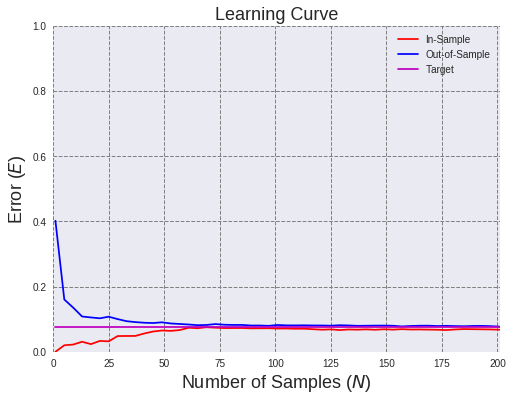

In [0]:
start_time = time.time()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(r'Number of Samples ($N$)', fontsize=18)
ax.set_ylabel(r'Error ($E$)', fontsize=18)
ax.set_title(r'Learning Curve'.format(N), fontsize=18)
ax.set_xlim(0, error_history[-1, 0])
ax.set_ylim(0, 1)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)

ax.plot(error_history[:, 0], error_history[:, 1], 'r-', label='In-Sample')
ax.plot(error_history[:, 0], error_history[:, 2], 'b-', label='Out-of-Sample')
ax.plot(error_history[[0, -1], 0], [target_error]*2, 'm-', label='Target')
ax.legend()

print('Plot took {:.2f} seconds.'.format(time.time()-start_time))

##Visualizing the Error Surface

For curiosity sake, let's try and visualize the error surface. But before visualizing the surface let's look at how the error measure changes as the gradient descent proceeds.

In [0]:
def plot_gradient_descent(w_h_i, cross_entropy_error):
    start_time = time.time()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(r'Iteration', fontsize=18)
    ax.set_ylabel(r'In-Sample Error ($E_{in}$)', fontsize=18)
    ax.set_title(r'Gradient Descent Evolution'.format(N), fontsize=18)
    ax.set_xlim(0, w_h_i.shape[0]-1)
    ax.set_ylim(0, 1)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.set_axisbelow(True)
    
    ax.plot(range(w_h_i.shape[0]), np.apply_along_axis(cross_entropy_error, 1, w_h_i), 'r-')
    
    print('Plot took {:.2f} seconds.'.format(time.time()-start_time))

Plot took 0.04 seconds.


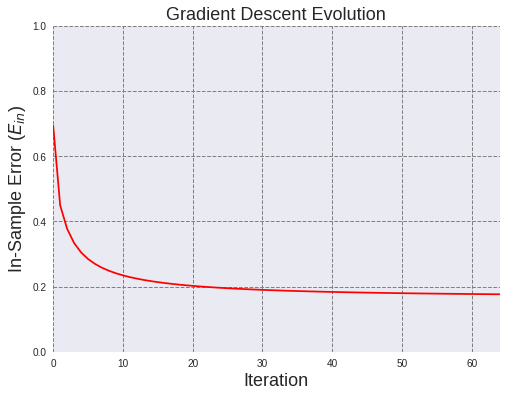

In [0]:
plot_gradient_descent(w_h_i, cross_entropy_error)

The in-sample error is parameterized by our model parameters ${\bf w}$. Unfortunately our parameter is of dimension $d_{\bf w}=3$ which makes visualization a bit more difficult (a four dimensional visualization problem: three parameters and an error value). Instead of tackling that directly (volumetrics and other fun stuff) we'll just visualize the top, front, and left slices of the error surface centered on the final hypothesis parameters. Along with these slices the iterations we've taken on the error surface using gradient descent which will be colored by iteration number backwards through a rainbow color map. Using the history of the weight vector through the gradient descent iterations we can determine the extents of our visualization.

In [0]:
def visualize_error_surface_slices(w_h_i, cross_entropy_error, s=150, figsize=(6, 6)):
    d_z = w_h_i.shape[1]
    
    w_h_i_mean = np.mean(w_h_i, axis=0)
    w_h_i_std = np.std(w_h_i, axis=0)
    w_h_i_min_extent = w_h_i_mean - 4 * np.max(w_h_i_std)
    w_h_i_max_extent = w_h_i_mean + 4 * np.max(w_h_i_std)
    w_h_i_colors = cm.ScalarMappable(norm=matplotlib.colors.Normalize(0, w_h_i.shape[0]-1),
                                     cmap=cm.gist_rainbow_r).to_rgba(range(w_h_i.shape[0]-1))
    
    for i_x, i_y in itertools.combinations(list(range(1, d_z)) + [0], 2):
    
        start_time = time.time()
        
        components = list(range(d_z))
        components.remove(i_x)
        components.remove(i_y)
        
        w_zs = [w_h[i] * np.ones((s*s, 1)) for i in components]
        w_x, w_y = np.array(np.meshgrid(np.linspace(w_h_i_min_extent[i_x], w_h_i_max_extent[i_x], s),
                                        np.linspace(w_h_i_min_extent[i_y], w_h_i_max_extent[i_y], s)))
        
        restack = [None] * (d_z)
        restack[i_x] = np.reshape(w_x, (s*s, 1))
        restack[i_y] = np.reshape(w_y, (s*s, 1))
        for i_z, w_z in zip(components, w_zs):
            restack[i_z] = w_z
        w_grid = np.hstack(restack)
        
        error_grid = np.reshape(np.apply_along_axis(cross_entropy_error, 1, w_grid), (s, s))
    
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
        ax.set_aspect(1)
        ax.set_xlabel(r'$w_{:}$'.format(i_x), fontsize=18)
        ax.set_ylabel(r'$w_{:}$'.format(i_y), fontsize=18)
        if d_z == 3:
            ax.set_title(r'Error Surface ({:} view)'.format({0: '"top-to-bottom"',
                                                             1: '"right-to-left"',
                                                             2: '"back-to-front"'}[components[0]]),
                         fontsize=18)
        else:
            ax.set_title(r'Error Surface', fontsize=18)
        ax.set_xlim(w_h_i_min_extent[i_x], w_h_i_max_extent[i_x])
        ax.set_ylim(w_h_i_min_extent[i_y], w_h_i_max_extent[i_y])
        ax.autoscale(False)
        
        ax.pcolor(w_x, w_y, error_grid, cmap=cm.gist_heat, vmin=np.min(error_grid), vmax=np.max(error_grid))
        
        ax.xaxis.grid(color='gray', linestyle='dashed')
        ax.yaxis.grid(color='gray', linestyle='dashed')
        
        for i in range(w_h_i.shape[0]-1):
            ax.plot(w_h_i[i:i+2, i_x], w_h_i[i:i+2, i_y], '-', c=w_h_i_colors[i])
        
        print('Plot took {:.2f} seconds.'.format(time.time()-start_time))

In [0]:
visualize_error_surface_slices(w_h_i, cross_entropy_error, s=150)

NameError: ignored

##Nonlinear Transformation

Like with the other linear models (perceptron, linear regression) we can transform the input data from the original input space ($\mathcal{X}$) into a higher dimension space ($\mathcal{Z}$) and fit our model there.

In this example we'll use a second-order polynomial transformation:

$$
\phi({\bf x}) = \begin{bmatrix} 1 & x_0 & x_1 & x_0 x_1 & x_0^2 & x_1^2 \end{bmatrix}
$$

In [0]:
d_x = 2

phi = lambda x: np.array([1, x[1], x[2], x[1]*x[2], x[1]**2, x[2]**2])
d_z = len( phi( np.ones((d_x+1,)) ) ) - 1

N = 30

In [0]:
w_f, f, P_f = generate_target(d_z, w_f=np.array([-3, 2, 3, 6, 9, 10]))
x, z, y, cross_entropy_error = generate_data_samples(N, P_x, phi, P_f)
x_1, x_2, x_grid, z_grid = generate_fill_data(300, phi)
f_grid = apply_to_fill(z_grid, f)
target_fig = plot_data_set_and_hypothesis(x, y, x_1, x_2, f_grid, title=r'Target, $N={:}$'.format(N))

In [0]:
w_h_i = gradient_descent(z, y, eta=4.0)
w_h = w_h_i[-1]
print('Number of iterations: {:}'.format(w_h_i.shape[0]))

In [0]:
h = lambda z: logistic(w_h.dot(z.T))
h_grid = apply_to_fill(z_grid, h)
hypothesis_fig = plot_data_set_and_hypothesis(x, y, x_1, x_2, h_grid, title=r'Hypothesis, $N={:}$'.format(N))

In [0]:
print('Target weights: {:}'.format(w_f))
print('Hypothesis weights: {:}'.format(w_h))
print('Hypothesis in-sample error: {:.2%}'.format(in_sample_error(z, y, h)))
print('Hypothesis out-of-sample error: {:.2%}'.format(estimate_out_of_sample_error(P_x, phi, P_f, h)))

For fun we'll try visualizing the error surface again. However, since we're operating in the $\mathcal{Z}$ space with dimension $d_\mathcal{Z}=6$ our two-dimensional visualizations are even more woefully inadequate. Regardless, below is the gradient descent evolution and all 15 combinations of two axes and their two-dimensional error "surface" slice centered on the hypothesis weight vector.

In [0]:
plot_gradient_descent(w_h_i, cross_entropy_error)

In [0]:
visualize_error_surface_slices(w_h_i, cross_entropy_error, s=150)